<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/LSTM30k_with_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.8.0


In [4]:
np.random.seed(19)

In [5]:
df=pd.read_csv("/content/combinedSample_GoldDs.csv")

In [6]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017


In [7]:
df['Local time']=df['Local time'].str[0:22]
df['Local time']

0         14.03.2021 22:00:00.00
1         14.03.2021 22:01:00.00
2         14.03.2021 22:02:00.00
3         14.03.2021 22:03:00.00
4         14.03.2021 22:04:00.00
                   ...          
199421    24.09.2021 13:42:00.00
199422    24.09.2021 13:43:00.00
199423    24.09.2021 13:44:00.00
199424    24.09.2021 13:45:00.00
199425    24.09.2021 13:46:00.00
Name: Local time, Length: 199426, dtype: object

In [8]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [9]:
df.shape

(199426, 15)

In [10]:
df=df[:30000]
df.shape

(30000, 15)

In [11]:

df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,14.03.2021 22:00:00.00,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,14.03.2021 22:01:00.00,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,14.03.2021 22:02:00.00,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,14.03.2021 22:03:00.00,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,14.03.2021 22:04:00.00,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [12]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [13]:
data=data.drop(['Volume_Bid','Volume_Ask'],axis=1)

In [14]:
data.head()

,Open,High,Low,Close
0,1727.4250,1729.6500,1727.3570,1728.8900
1,1728.9735,1730.1210,1728.9285,1729.9145
2,1729.9365,1730.4545,1729.8395,1730.3315
3,1730.3265,1730.4645,1729.1980,1729.4530
4,1729.4085,1729.6465,1728.5765,1728.9635


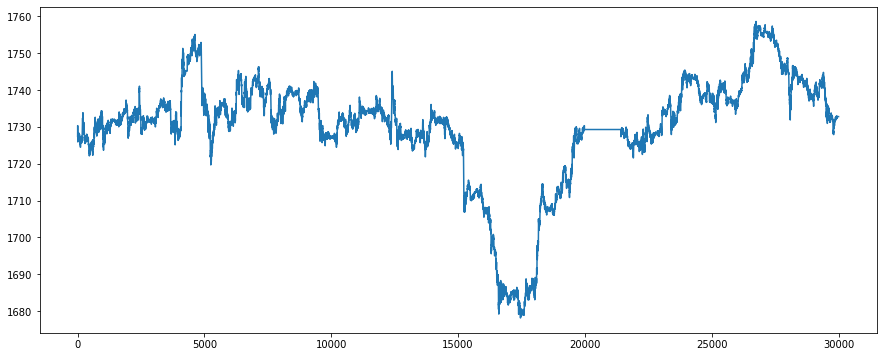

In [15]:
data['Open'].plot(figsize=(15,6))

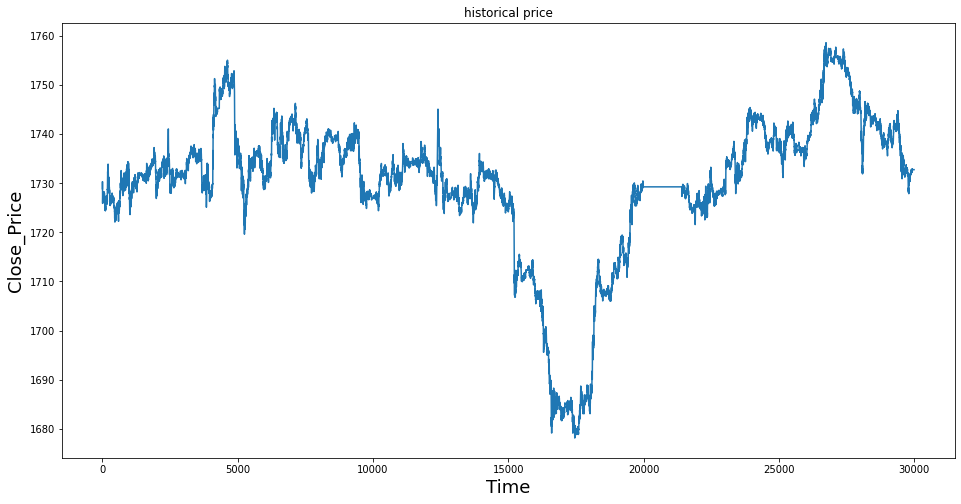

In [16]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [17]:
data_mini = data.iloc[-100:] # Select recent data rows
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_mini.index, open=data_mini['Open'], high=data_mini['High'], low=data_mini['Low'], close=data_mini['Close'])])
fig.show()

In [18]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
validation_data_len = int(np.ceil( len(dataset) * .05 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)


27000
1500
1500


In [19]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.63058626],
       [0.64331139],
       [0.64849087],
       [0.63757918],
       [0.63149919]])

In [21]:
data.head()

,Close
0,1728.8900
1,1729.9145
2,1730.3315
3,1729.4530
4,1728.9635


In [22]:
#downsizing
#data['Open']=pd.to_numeric(data['Open'],downcast='float')
#data['High']=pd.to_numeric(data['High'],downcast='float')
#data['Low']=pd.to_numeric(data['Low'],downcast='float')
#data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   30000 non-null  float64
dtypes: float64(1)
memory usage: 234.5 KB


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
## Negative volume implies lack of liquidity in the marketdata
#data[data.Volume_Bid < 0] #no values 

In [25]:
print(data.isna().sum())

Close    0
dtype: int64


In [26]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]
print(train_data.shape)
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(27000, 1)
[array([0.63058626, 0.64331139, 0.64849087, 0.63757918, 0.63149919,
       0.60079493, 0.59891318, 0.59347286, 0.59908086, 0.61348901,
       0.61326543, 0.60500559, 0.60553968, 0.61421563, 0.61251397,
       0.61030307, 0.61423426, 0.60932803, 0.61232766, 0.60970066,
       0.6118743 , 0.61369395, 0.61224693, 0.61119116, 0.59566513,
       0.60380077, 0.59920507, 0.602745  , 0.60659545, 0.60545895,
       0.61206061, 0.61094274, 0.60684387, 0.60088188, 0.60231027,
       0.6103217 , 0.6118743 , 0.61255745, 0.61379953, 0.60821016,
       0.61280586, 0.61006707, 0.60796174, 0.60678177, 0.61289281,
       0.61218482, 0.61827102, 0.61212272, 0.61150168, 0.60821016,
       0.60591231, 0.60659545, 0.61001118, 0.61112905, 0.61019749,
       0.61156378, 0.62317725, 0.62123339, 0.6175444 , 0.61816545])]
[0.6078934293876515]

[array([0.63058626, 0.64331139, 0.64849087, 0.63757918, 0.63149919,
       0.60079493, 0.59891318, 0.59347286, 0.59908086, 0.61348901,
       0.61326543, 0.6050

(26940, 60, 1)

In [27]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape



[array([0.95199354, 0.95506148, 0.9548938 , 0.95893057, 0.95862005,
       0.95930319, 0.95408645, 0.95294994, 0.95468886, 0.95282574,
       0.95698671, 0.95613588, 0.95594957, 0.95655198, 0.95756428,
       0.95886846, 0.95723513, 0.95481307, 0.95824742, 0.95909825,
       0.95725376, 0.95940877, 0.9582909 , 0.95853931, 0.9584151 ,
       0.9568625 , 0.95425413, 0.95847721, 0.95998634, 0.95818532,
       0.95655198, 0.9552478 , 0.95549621, 0.95133524, 0.95518569,
       0.9552478 , 0.95239101, 0.95412992, 0.95748354, 0.95884983,
       0.95810458, 0.95978139, 0.95698671, 0.95704881, 0.9568004 ,
       0.95605515, 0.95475096, 0.95350888, 0.95681903, 0.95669482,
       0.95288784, 0.95240964, 0.95408645, 0.9522047 , 0.95216122,
       0.95129176, 0.95104335, 0.95371382, 0.95444044, 0.95512359])]
[0.9547074897528276]

[array([0.95199354, 0.95506148, 0.9548938 , 0.95893057, 0.95862005,
       0.95930319, 0.95408645, 0.95294994, 0.95468886, 0.95282574,
       0.95698671, 0.95613588, 0.955

(1500, 60, 1)

In [28]:

from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss')
#es = EarlyStopping(monitor='val_loss', mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
#es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)


In [29]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(128, return_sequences= True))
model.add(LSTM(256, return_sequences= False))
model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
model.add(Dense(1,activation="relu"))
#model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# model.add(GRU(128, return_sequences= True))
# model.add(GRU(256, return_sequences= False))
# model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
# model.add(Dense(1,activation="relu"))
print(model.summary())
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=1, validation_data=(x_valid, y_valid), epochs=10, callbacks=[es])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 516,403
Trainable params: 516,403
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
26940/26940 [=====================

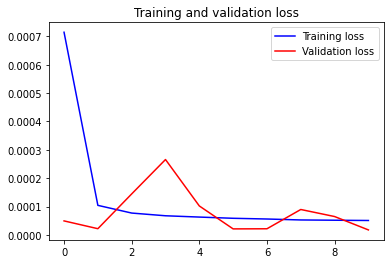

In [30]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [31]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse



0.33468136465320814

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

0.2499587128906196

In [33]:
mse=np.mean(((predictions - y_test) ** 2))
mse

0.11201161584613369

In [34]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.33468136465320814

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



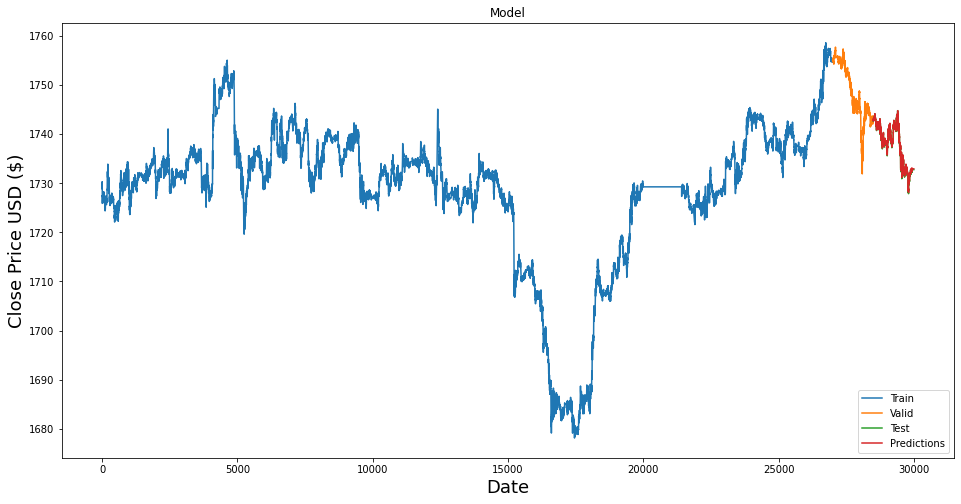

In [35]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()



In [36]:
y_test[:5]

array([[1742.8585],
       [1742.6335],
       [1742.6235],
       [1742.795 ],
       [1742.7995]])

In [42]:
predictions[:5]

array([[1743.1165],
       [1742.9186],
       [1742.7131],
       [1742.7072],
       [1742.8724]], dtype=float32)

# New Section